# Happiness Modeling (Summer 2021)
This summer, I endeavored to try and use statistics + data science to evaluate how my daily choices affect my average happiness. After recording 11 features of my day, plus a **"happiness"** score, I'm now working on building a model that reflects both my perception of my days as well as the numerical relationship among my collected data.

## 1.0 - Simple Multiple Regression and Reading In Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import linear_model as lm

In [3]:
happiness = pd.read_csv('Responsibility Sheet - Happiness Tracking Raw Data (1).csv')
happiness.describe()

,People Seen,Meals Eaten,Catherine,Hours of sleep,Workout?,Hours of Classes,Hours of music,Weather (rain = 0 to sun = 1),Average (Day) Temperature,Hours of project/internship,Happiness?
count,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,32.171429,3.000000,0.628571,8.50000,0.371429,2.085714,0.742857,0.762857,76.600000,3.285714,7.771429
std,37.828938,0.594089,0.475006,0.83137,0.490241,1.437347,1.045800,0.150168,6.950243,3.169908,1.313632
min,4.000000,1.500000,0.000000,6.00000,0.000000,0.000000,0.000000,0.300000,62.000000,0.000000,4.000000
25%,12.500000,3.000000,0.000000,8.00000,0.000000,1.000000,0.000000,0.700000,70.000000,0.000000,7.000000
50%,20.000000,3.000000,1.000000,9.00000,0.000000,2.000000,0.000000,0.800000,75.000000,4.000000,8.000000
75%,30.000000,3.500000,1.000000,9.00000,1.000000,3.000000,1.000000,0.900000,80.000000,6.000000,9.000000
max,200.000000,4.000000,1.000000,10.00000,1.000000,5.000000,4.000000,1.000000,92.000000,8.000000,9.000000


In [4]:
happiness = happiness.drop('Date', axis = 1)
happiness.head()

,People Seen,Meals Eaten,Catherine,Hours of sleep,Workout?,Hours of Classes,Hours of music,Weather (rain = 0 to sun = 1),Average (Day) Temperature,Hours of project/internship,Happiness?
0,20,2.0,1.0,9.0,1,2.0,3.0,0.8,62,0.0,9.0
1,200,3.0,1.0,8.0,0,2.0,1.0,0.5,70,0.0,7.0
2,10,3.0,0.0,7.0,1,0.0,0.5,0.9,92,0.0,8.0
3,20,4.0,0.0,10.0,0,0.0,0.0,1.0,90,0.0,9.0
4,8,3.0,1.0,6.0,0,2.0,0.0,0.4,80,0.0,9.0


In [5]:
X = happiness.drop('Happiness?', axis = 1)
X.head()

,People Seen,Meals Eaten,Catherine,Hours of sleep,Workout?,Hours of Classes,Hours of music,Weather (rain = 0 to sun = 1),Average (Day) Temperature,Hours of project/internship
0,20,2.0,1.0,9.0,1,2.0,3.0,0.8,62,0.0
1,200,3.0,1.0,8.0,0,2.0,1.0,0.5,70,0.0
2,10,3.0,0.0,7.0,1,0.0,0.5,0.9,92,0.0
3,20,4.0,0.0,10.0,0,0.0,0.0,1.0,90,0.0
4,8,3.0,1.0,6.0,0,2.0,0.0,0.4,80,0.0


In [6]:
y = happiness['Happiness?']

In [7]:
cols = happiness.columns.tolist()

In [8]:
model = lm.LinearRegression()

In [9]:
model.fit(X, y)

LinearRegression()

In [10]:
model.coef_

array([-0.00346198,  0.97488214,  0.59314289, -0.278469  ,  0.44655544,
        0.02423806,  0.12286633,  1.75817728, -0.01601469, -0.15895293])

In [11]:
for name, coef in zip(cols, model.coef_):
    print(name, ':', coef)
print('with intercept =', model.intercept_)

People Seen : -0.003461980507812812
Meals Eaten : 0.9748821381671018
Catherine : 0.5931428903471263
Hours of sleep : -0.2784690000349242
Workout? : 0.4465554367944105
Hours of Classes : 0.024238061266047828
Hours of music : 0.12286633219258714
Weather (rain = 0 to sun = 1) : 1.7581772829006244
Average (Day) Temperature : -0.016014689069799526
Hours of project/internship : -0.15895293275696215
with intercept = 7.052384596828146


In [12]:
cathpiness = happiness.groupby('Catherine').mean()
cathpiness

,People Seen,Meals Eaten,Hours of sleep,Workout?,Hours of Classes,Hours of music,Weather (rain = 0 to sun = 1),Average (Day) Temperature,Hours of project/internship,Happiness?
Catherine,,,,,,,,,,
0.0,24.666667,2.958333,8.583333,0.416667,2.583333,0.583333,0.741667,79.500000,4.000000,7.166667
0.5,17.500000,3.500000,8.500000,0.000000,1.500000,0.000000,0.725000,85.000000,2.500000,8.000000
1.0,37.857143,2.976190,8.452381,0.380952,1.857143,0.904762,0.778571,74.142857,2.952381,8.095238


In [13]:
# There are too few 0.5's for them to be their own class, so they're reasonably being absorbed by class 0
happiness2 = happiness.copy()
happiness2['Adjusted Catherine'] = happiness2['Catherine'].replace(0.5, 0)
happiness2.groupby('Adjusted Catherine').mean()

,People Seen,Meals Eaten,Catherine,Hours of sleep,Workout?,Hours of Classes,Hours of music,Weather (rain = 0 to sun = 1),Average (Day) Temperature,Hours of project/internship,Happiness?
Adjusted Catherine,,,,,,,,,,,
0.0,23.642857,3.035714,0.071429,8.571429,0.357143,2.428571,0.500000,0.739286,80.285714,3.785714,7.285714
1.0,37.857143,2.976190,1.000000,8.452381,0.380952,1.857143,0.904762,0.778571,74.142857,2.952381,8.095238


Text(0.5, 1.0, 'Singular Values of Happiness')

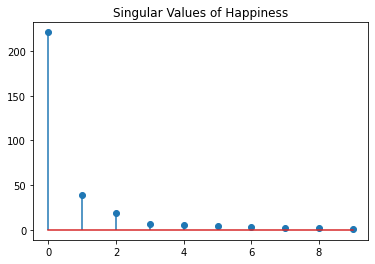

In [14]:
plt.stem(model.singular_)
plt.title('Singular Values of Happiness')

## 2.0 - Pivoting to More Advanced Modeling

In [15]:
def comparemodels():
    plt.bar(modelscoredict.keys(), modelscoredict.values())
    plt.title('R^2 Values for All Models So Far');
    
def addmodel(name, score):
    modelscoredict[name] = score

In [16]:
ridgemodel = lm.Ridge()

In [17]:
def standardizedf(df):
    for col in df.iloc[:, :-1]:
        df[col] = (df[col] - np.mean(df[col])) / np.std(df[col])
standardizedf(happiness)
happiness.head()

,People Seen,Meals Eaten,Catherine,Hours of sleep,Workout?,Hours of Classes,Hours of music,Weather (rain = 0 to sun = 1),Average (Day) Temperature,Hours of project/internship,Happiness?
0,-0.326446,-1.707825,0.793362,0.610197,1.300887,-0.060504,2.189803,0.250953,-2.131314,-1.051666,9.0
1,4.501283,0.000000,0.793362,-0.610197,-0.768706,-0.060504,0.249471,-1.775976,-0.963471,-1.051666,7.0
2,-0.594654,0.000000,-1.342612,-1.830591,1.300887,-1.472271,-0.235612,0.926596,2.248098,-1.051666,8.0
3,-0.326446,1.707825,-1.342612,1.830591,-0.768706,-1.472271,-0.720695,1.602239,1.956137,-1.051666,9.0
4,-0.648295,0.000000,0.793362,-3.050985,-0.768706,-0.060504,-0.720695,-2.451619,0.496333,-1.051666,9.0


In [18]:
happiness.describe()

,People Seen,Meals Eaten,Catherine,Hours of sleep,Workout?,Hours of Classes,Hours of music,Weather (rain = 0 to sun = 1),Average (Day) Temperature,Hours of project/internship,Happiness?
count,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,35.000000
mean,-2.379049e-18,-1.268826e-17,3.172066e-17,1.268826e-17,6.344132e-18,-1.538452e-16,9.516197e-18,-2.347329e-16,7.961885e-16,1.141944e-16,7.771429
std,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.313632
min,-7.555780e-01,-2.561738e+00,-1.342612e+00,-3.050985e+00,-7.687061e-01,-1.472271e+00,-7.206946e-01,-3.127262e+00,-2.131314e+00,-1.051666e+00,4.000000
25%,-5.276019e-01,0.000000e+00,-1.342612e+00,-6.101970e-01,-7.687061e-01,-7.663876e-01,-7.206946e-01,-4.246898e-01,-9.634707e-01,-1.051666e+00,7.000000
50%,-3.264465e-01,0.000000e+00,7.933617e-01,6.101970e-01,-7.687061e-01,-6.050429e-02,-7.206946e-01,2.509531e-01,-2.335686e-01,2.286229e-01,8.000000
75%,-5.823927e-02,8.539126e-01,7.933617e-01,6.101970e-01,1.300887e+00,6.453791e-01,2.494712e-01,9.265960e-01,4.963334e-01,8.687672e-01,9.000000
max,4.501283e+00,1.707825e+00,7.933617e-01,1.830591e+00,1.300887e+00,2.057146e+00,3.159969e+00,1.602239e+00,2.248098e+00,1.508911e+00,9.000000


In [19]:
Xsu = happiness.drop('Happiness?', axis = 1)
Xsu.head()
ysu = happiness['Happiness?']

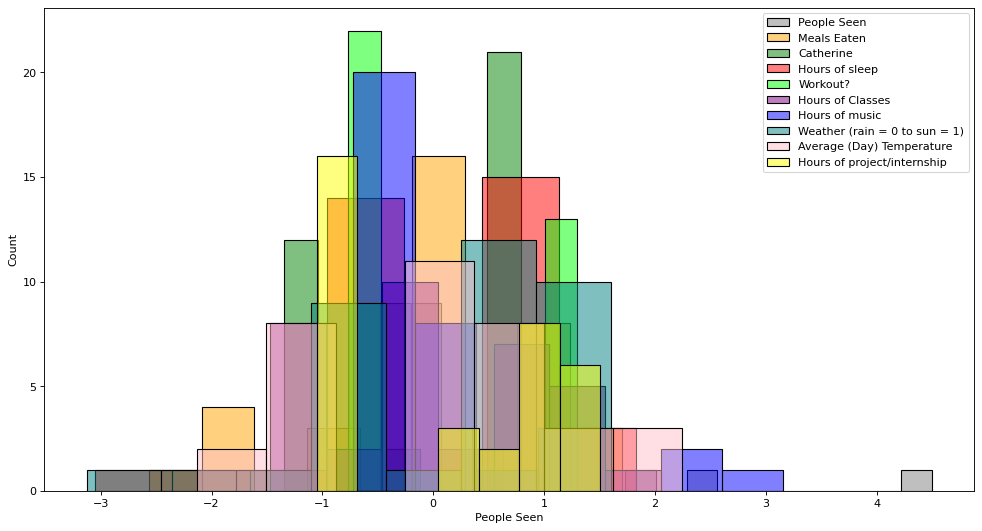

In [20]:
plt.figure(figsize=(15, 8), dpi=80)
sns.color_palette("Set2", 10)
sns.set_color_codes()
colors = ['grey', 'orange', 'green', 'red', 'lime', 'purple', 'blue', 'teal', 'pink', 'yellow']
for col, colour in zip(happiness.columns, colors):
    sns.histplot(happiness[col], color = colour, alpha = 0.5)
plt.legend(happiness.columns);

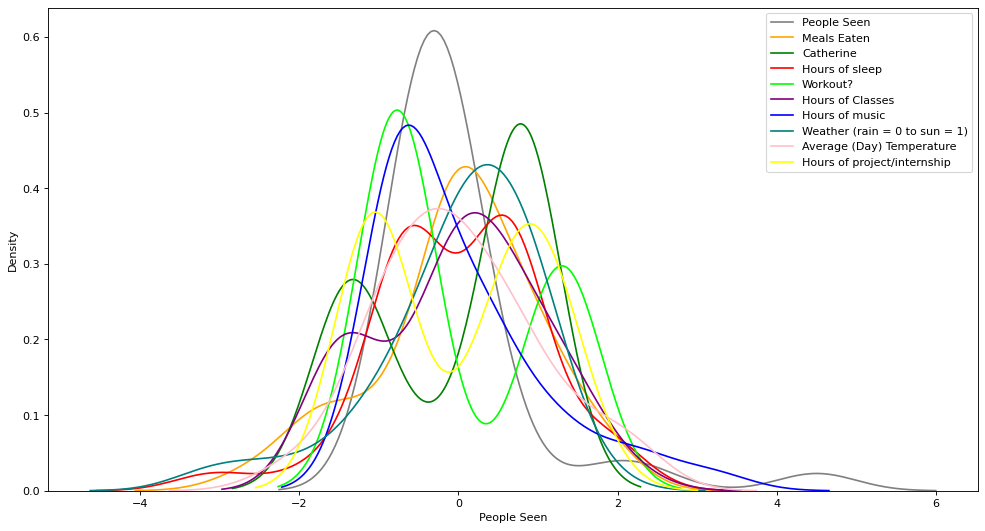

In [21]:
plt.figure(figsize=(15, 8), dpi=80)
for col, colour in zip(happiness.columns, colors):
    sns.kdeplot(happiness[col], color = colour, alpha = 0.5)
plt.legend(happiness.columns);

In [22]:
ridgemodel.fit(Xsu, ysu)

Ridge()

In [23]:
ridgemodel.coef_

array([-0.11811092,  0.54871587,  0.26850408, -0.22924744,  0.20347139,
        0.00331374,  0.1306808 ,  0.25354506, -0.10566276, -0.45596456])

In [24]:
modelscoredict = {}
addmodel('Least Squares', model.score(X, y))
model.score(X,y)

0.5501270353578023

In [25]:
addmodel('Ridge', ridgemodel.score(Xsu, y))
ridgemodel.score(Xsu, y)

0.5494727672064242

Average (Day) Temperature  had the largest change, from  -0.016014689069799526  to  -0.10566276339468252


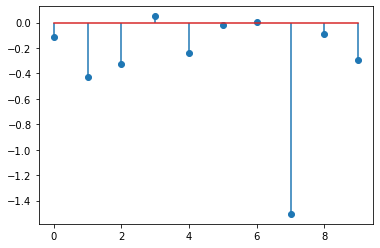

In [26]:
plt.stem(ridgemodel.coef_ - model.coef_)
print(cols[8] , ' had the largest change, from ', model.coef_[8], ' to ', ridgemodel.coef_[8])

Text(0.5, 1.0, 'Least Squares Coefficients vs. Ridge Coefficients')

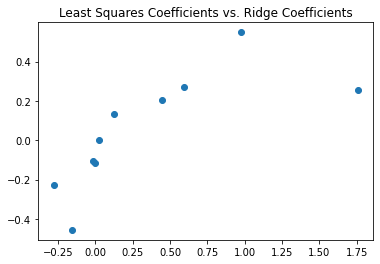

In [27]:
plt.scatter(model.coef_, ridgemodel.coef_)
plt.title('Least Squares Coefficients vs. Ridge Coefficients')

In [28]:
for name, coef in zip(cols, ridgemodel.coef_):
    print(name, ':', coef)
print('with intercept =', ridgemodel.intercept_)

People Seen : -0.11811091671198784
Meals Eaten : 0.5487158655619879
Catherine : 0.2685040803166843
Hours of sleep : -0.22924744237056857
Workout? : 0.20347138555146396
Hours of Classes : 0.0033137368962866923
Hours of music : 0.13068079574124877
Weather (rain = 0 to sun = 1) : 0.25354505757012746
Average (Day) Temperature : -0.10566276339468252
Hours of project/internship : -0.4559645599937266
with intercept = 7.771428571428571


In [29]:
elasticmodel = lm.ElasticNet()

In [30]:
elasticmodel.fit(Xsu, ysu)

ElasticNet()

In [31]:
elasticmodel.coef_

array([-0.       ,  0.1139542,  0.       , -0.       ,  0.       ,
       -0.       ,  0.       ,  0.       , -0.       , -0.       ])

In [32]:
addmodel('Elastic', elasticmodel.score(Xsu, y))
elasticmodel.score(Xsu, y)

0.08347139831510708

In [33]:
testarr = [1,2,3,4,5,6]
testarr.index(max(testarr))

5

Weather (rain = 0 to sun = 1)  had the largest change, from  1.7581772829006244  to  0.0


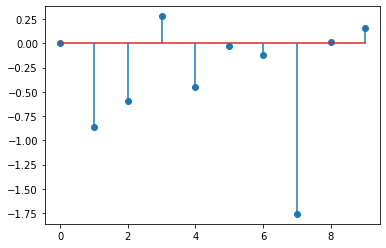

In [34]:
changes = elasticmodel.coef_ - model.coef_
plt.stem(changes);
changesmag = (abs(changes)).tolist()
biggestdiff = changesmag.index(max(changesmag))
print(cols[biggestdiff] , ' had the largest change, from ', model.coef_.tolist()[biggestdiff], ' to ', elasticmodel.coef_.tolist()[biggestdiff])

Hours of project/internship  had the largest change, from  -0.4559645599937266  to  -0.0


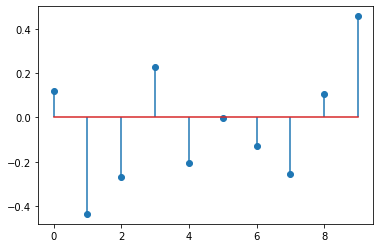

In [35]:
changes = elasticmodel.coef_ - ridgemodel.coef_
plt.stem(changes);
changesmag = (abs(changes)).tolist()
biggestdiff = changesmag.index(max(changesmag))
print(cols[biggestdiff] , ' had the largest change, from ', ridgemodel.coef_.tolist()[biggestdiff], ' to ', elasticmodel.coef_.tolist()[biggestdiff])

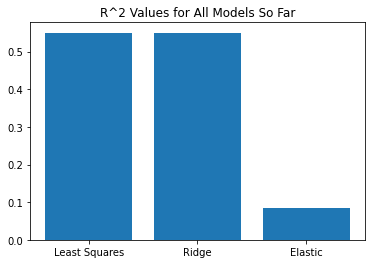

In [36]:
comparemodels()

In [44]:
for name, coef in zip(cols, elasticmodel.coef_):
    print(name, ':', coef)
print('with intercept =', ridgemodel.intercept_)

People Seen : -0.0
Meals Eaten : 0.11395420010141101
Catherine : 0.0
Hours of sleep : -0.0
Workout? : 0.0
Hours of Classes : -0.0
Hours of music : 0.0
Weather (rain = 0 to sun = 1) : 0.0
Average (Day) Temperature : -0.0
Hours of project/internship : -0.0
with intercept = 7.771428571428571


## 3.0 - Testing the Models

In [45]:
# Extreme test cases and Regular test cases to Explore general Viability
myworstday = np.array([0, 1, 0, 5, 0, 10, 0, 0, 30, 10]).reshape(1, -1)
mybestday = np.array([100, 3, 1, 9, 1, 5, 2, 1, 70, 0]).reshape(1, -1)
anaverageday = np.array([40, 3, 1, 8, 1, 8, 1, 0.8, 75, 0]).reshape(1, -1)
highschoolavg = np.array([50, 3, 0, 8, 0, 6, 2, 0.7, 90, 0]).reshape(1, -1)
tomorrowprob = np.array([20, 3, 1, 9, 1, 2, 1, 0.8, 70, 7]).reshape(1, -1)
tests = [myworstday, mybestday, anaverageday, highschoolavg, tomorrowprob]
target = np.array([5, 10, 8, 8, 9])
 

In [46]:
happinesscopy = pd.read_csv('Responsibility Sheet - Happiness Tracking Raw Data (1).csv')
happinesscopy = happinesscopy.drop(['Date', 'Happiness?'], axis = 1)
avgs = []
stds = []
for col in happinesscopy.columns:
    avgs.append(np.mean(happinesscopy[col]))
    stds.append(np.std(happinesscopy[col]))
print(len(avgs), len(stds))

10 10


In [53]:
tests[0][0][0]

0

In [60]:
standardtests = []
for arr in tests:
    current = []
    for index in np.arange(10):
        current.append((arr[0][index] - avgs[index]) / stds[index])
    standardtests.append(np.array(current).reshape(1, -1))

In [61]:
standardtests

[array([[-0.86286084, -3.41565026, -1.34261203, -4.27137927, -0.76870611,
          5.58656251, -0.72069459, -5.15419045, -6.80268671,  2.14905568]]),
 array([[ 1.81921103,  0.        ,  0.79336166,  0.61019704,  1.30088727,
          2.05714576,  1.219637  ,  1.60223898, -0.96347065, -1.05166554]]),
 array([[ 0.20996791,  0.        ,  0.79336166, -0.61019704,  1.30088727,
          4.17479581,  0.2494712 ,  0.25095309, -0.23356864, -1.05166554]]),
 array([[ 0.4781751 ,  0.        , -1.34261203, -0.61019704, -0.76870611,
          2.76302911,  1.219637  , -0.42468985,  1.95613738, -1.05166554]]),
 array([[-0.32644646,  0.        ,  0.79336166,  0.61019704,  1.30088727,
         -0.06050429,  0.2494712 ,  0.25095309, -0.96347065,  1.18883931]])]

In [62]:
model.predict(myworstday)[0]

4.807332347817498

In [63]:
target[tests.index(myworstday)]

5

In [66]:
modelperformance = []
rawmodelperformance = []
temp = 0
templist = []
targetindex = 0
for arr in tests:
    score = model.predict(arr)[0] - target[targetindex]
    temp += score
    templist.append(score)
    targetindex+=1

modelperformance.append(temp)
rawmodelperformance.append(templist)
    
for arch in [ridgemodel, elasticmodel]:
    temp = 0
    templist = []
    targetindex = 0
    for arr in standardtests:
        score = arch.predict(arr)[0] - target[targetindex]
        temp += score
        templist.append(score)
        targetindex += 1
    modelperformance.append(temp)
    rawmodelperformance.append(templist)

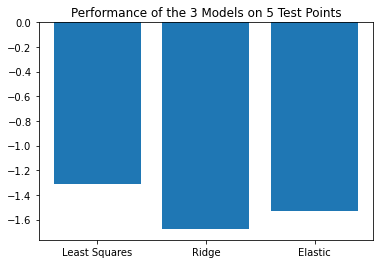

In [67]:
plt.bar(modelscoredict.keys(), modelperformance)
plt.title('Performance of the 3 Models on 5 Test Points');

In [68]:
# Interestingly enough, Elastic actually performs best in the long run! Although its individual predictions are worse


In [69]:
rawmodelperformance[0][0], rawmodelperformance[1][0], rawmodelperformance[2][0]

(-0.19266765218250193, -0.18217397354663412, 2.3822008787574154)

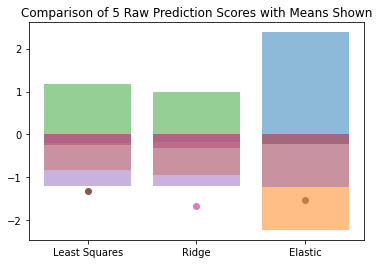

In [70]:
for i in np.arange(5):
    plt.bar(modelscoredict.keys(), [rawmodelperformance[0][i], 
                                    rawmodelperformance[1][i],
                                    rawmodelperformance[2][i]], alpha = 0.5)
plt.scatter(0, modelperformance[0])
plt.scatter(1, modelperformance[1])
plt.scatter(2, modelperformance[2])
plt.title('Comparison of 5 Raw Prediction Scores with Means Shown');

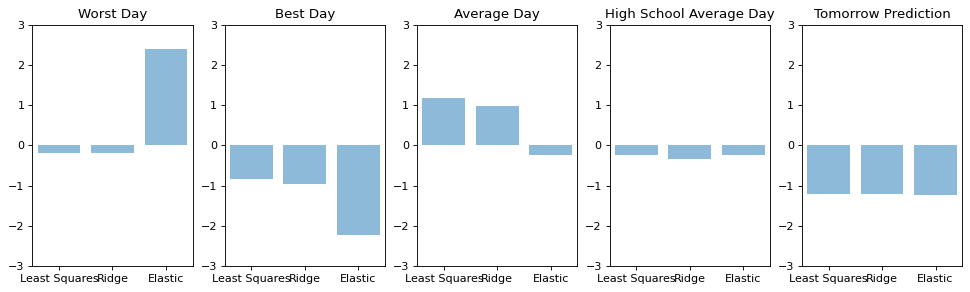

In [73]:
#Now separately
plt.figure(figsize=(15, 4), dpi=80)
testnames = ['Worst Day', 'Best Day', 'Average Day', 'High School Average Day', 'Tomorrow Prediction']
for i in np.arange(5):
    plt.subplot(1, 5, i+1)
    plt.bar(modelscoredict.keys(), [rawmodelperformance[0][i], 
                                    rawmodelperformance[1][i],
                                    rawmodelperformance[2][i]], alpha = 0.5)
    plt.title(testnames[i])
    plt.axis((-0.5, 2.5, -3, 3))